# Saksham Gupta

# Final Assessment

In [1]:
import pandas as pd;
import numpy as np;

## 1 Load Dataset

In [2]:
# bringing the data
git_airline = 'https://raw.githubusercontent.com/DeepsphereAI/FinalAssessment/main/LVA-DSAI-Airline%20Dataset.csv'
git_titanic = 'https://raw.githubusercontent.com/DeepsphereAI/FinalAssessment/main/LVA-DSAI-Titanic%20Dataset.csv'
# imported using pandas
airline = pd.read_csv(git_airline)
titanic = pd.read_csv(git_titanic)

### Basic things to examine

In [7]:
# Display basic information for the airline dataset consists of the rows and columns
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
# Display basic information for the Titanic dataset consists of the rows and columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.8+ KB


## 2. Data Cleaning

In [10]:
# 2.1 Check and Handle missing values
# For both datasets
airline_missing = airline.isnull().sum()
titanic_missing = titanic.isnull().sum()
print(airline_missing)
print(titanic_missing)

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64
PassengerId      1
Survived         1
Pclass           1
Name             1
Sex              1
Age            178
SibSp            1
Parch            1
Ticket           1
Fare             1
Cabin          688
Embarked         3
dtype: int64


In [11]:
# Decide whether to fill or drop missing values based on analysis
# Identify and resolve duplicate data entries
airline_duplicates = airline.duplicated().sum()
titanic_duplicates = titanic.duplicated().sum()
print(airline_duplicates)
print(titanic_duplicates)


0
0


In [12]:
# Drop duplicates if necessary
airline = airline.drop_duplicates()
titanic = titanic.drop_duplicates()

## 3. Descriptive

In [13]:
# Display descriptive statistics for numerical data in the airline dataset
print("Airline Dataset Descriptive Statistics:")
airline.describe()

Airline Dataset Descriptive Statistics:


,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


In [14]:
# Display descriptive statistics for numerical data in the Titanic dataset
print("\nTitanic Dataset Descriptive Statistics:")
titanic.describe()


Titanic Dataset Descriptive Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Median, Mode, Range, and Variance for Airline dataset
airline_numerical_stats = airline.describe().loc[['50%', 'std', 'min', 'max']]
airline_numerical_stats.loc['mode'] = airline.mode().iloc[0]

print("Airline Dataset Numerical Statistics:")
print(airline_numerical_stats)

Airline Dataset Numerical Statistics:
            Age
50%   46.000000
std   25.929849
min    1.000000
max   90.000000
mode  29.000000


In [18]:
# Median, Mode, Range, and Variance for Titanic dataset
titanic_numerical_stats = titanic.describe().loc[['50%', 'std', 'min', 'max']]
titanic_numerical_stats.loc['mode'] = titanic.mode().iloc[0]

print("\nTitanic Dataset Numerical Statistics:")
print(titanic_numerical_stats)


Titanic Dataset Numerical Statistics:
      PassengerId  Survived    Pclass        Age     SibSp     Parch  \
50%    446.000000  0.000000  3.000000  28.000000  0.000000  0.000000   
std    257.353842  0.486592  0.836071  14.526497  1.102743  0.806057   
min      1.000000  0.000000  1.000000   0.420000  0.000000  0.000000   
max    891.000000  1.000000  3.000000  80.000000  8.000000  6.000000   
mode     1.000000  0.000000  3.000000  24.000000  0.000000  0.000000   

            Fare  
50%    14.454200  
std    49.693429  
min     0.000000  
max   512.329200  
mode    8.050000  


## 4. Data Visualization

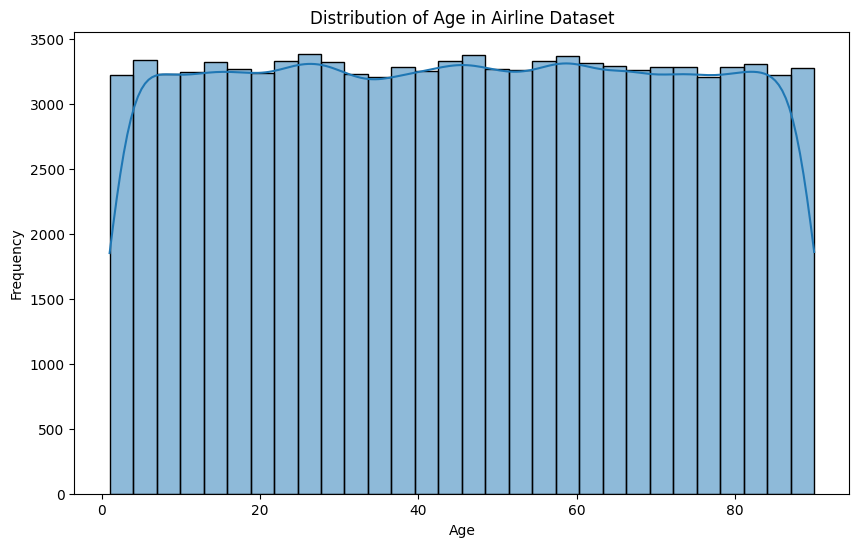

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for Age in Airline dataset
plt.figure(figsize=(10, 6))
sns.histplot(airline['Age'], bins=30, kde=True)
plt.title('Distribution of Age in Airline Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

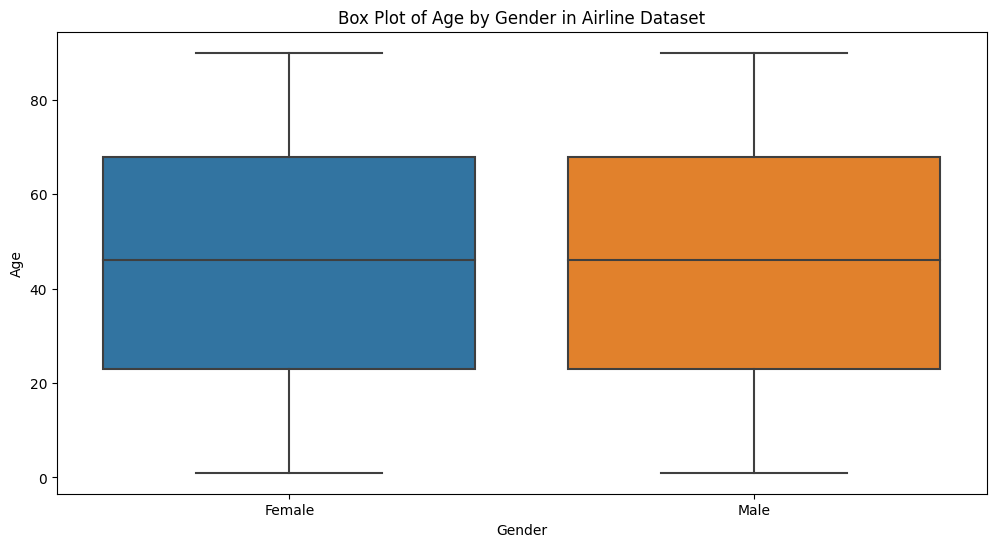

In [19]:
# box Plot of Age by Gender in Airline Dataset
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Age', data=airline)
plt.title('Box Plot of Age by Gender in Airline Dataset')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


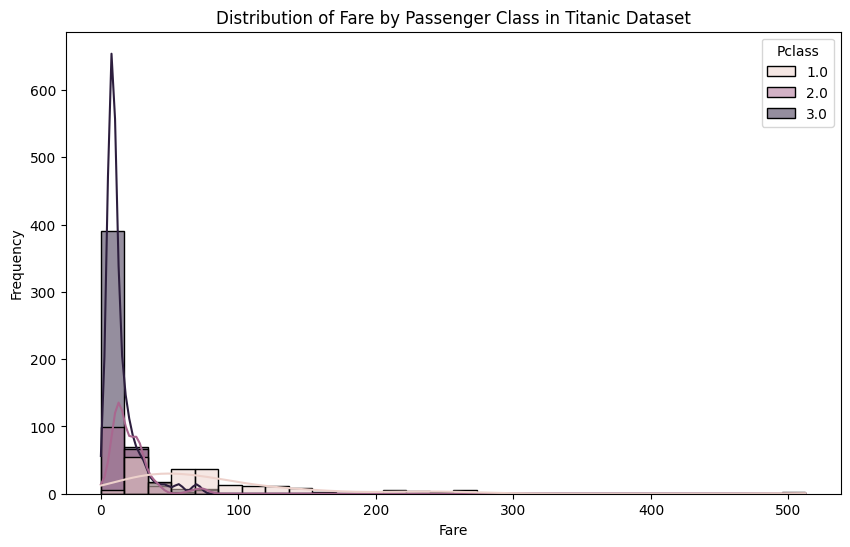

In [21]:
# Distribution of Fare by Passenger Class in Titanic Dataset
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', hue='Pclass', data=titanic, bins=30, kde=True)
plt.title('Distribution of Fare by Passenger Class in Titanic Dataset')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


## 5. Identifying Relationships

<ipython-input-23-46105a17609f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr()


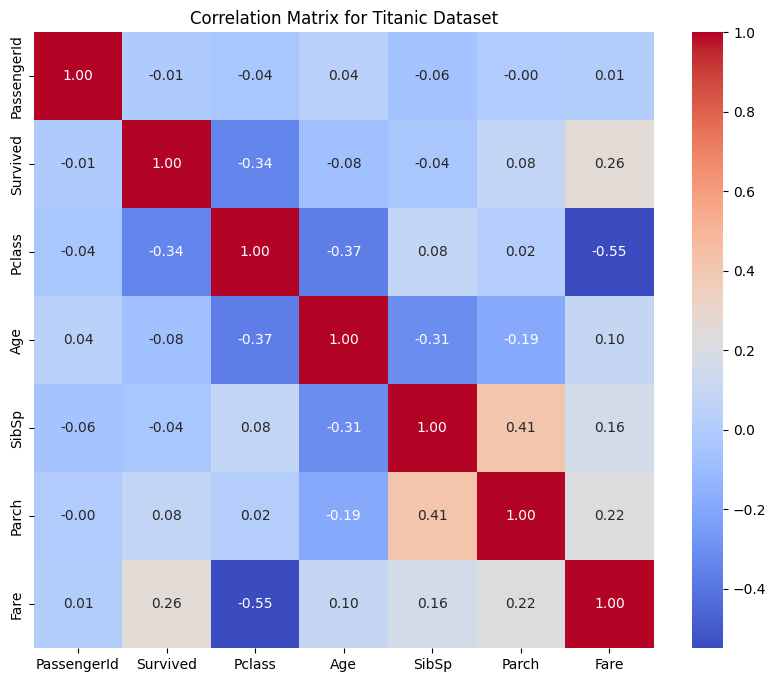

In [23]:
# Example: Correlation matrix for numerical variables in the Titanic dataset
correlation_matrix = titanic.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Titanic Dataset')
plt.show()

In [ ]:
# Getting major data from titanic
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from matplotlib import pyplot as plt
_df_60['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_63['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_69['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_70['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_71['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
# Getting major data from airline
airline.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


from matplotlib import pyplot as plt
_df_72['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_73['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

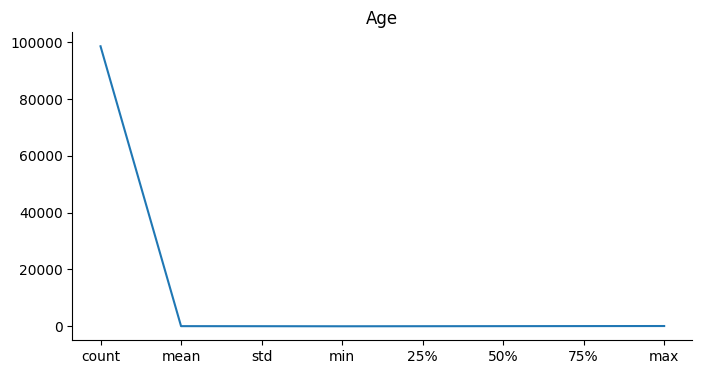

In [28]:
from matplotlib import pyplot as plt
_df_73['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

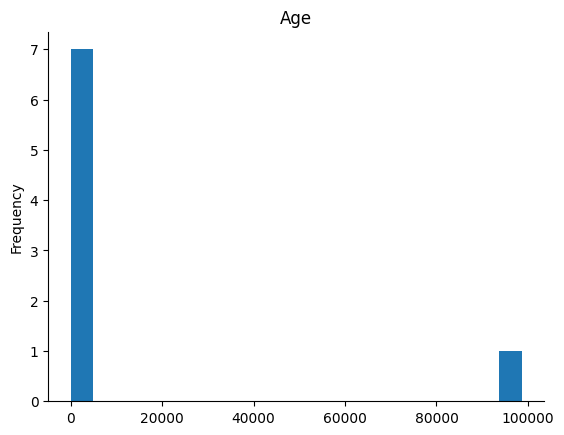

In [27]:
from matplotlib import pyplot as plt
_df_72['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
airline.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


## 6. Anamoly Detection

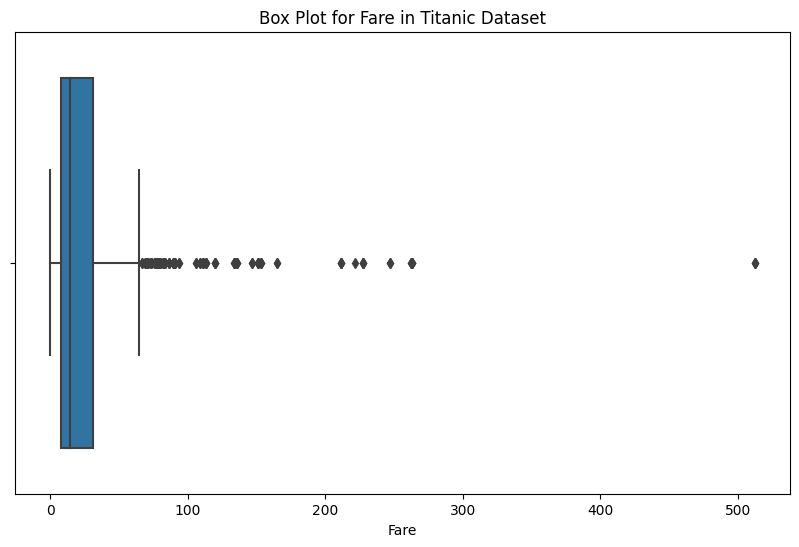

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=titanic)
plt.title('Box Plot for Fare in Titanic Dataset')
plt.show()

## 7. Data Discovery


Titanic

1.   The Average age of the passengers on the titanic was 29.
2.   The survival average in titanic was 0.389

Airline

3.   The Average age of the passengers in the airline dataset is 45.
4.   The majority of flights are "On Time".



#END